In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
calories_money_path = "Resources/coefficient-of-variation-cv-in-per-capita-caloric-intake.csv"
meat_kilos_path = "Resources/daily-meat-consumption-per-person.csv"
calories_supply_path = "Resources/daily-per-capita-caloric-supply.csv"
fat_money_path = "Resources/daily-per-capita-fat-supply-vs-gdp-per-capita.csv"
fat_path = "Resources/daily-per-capita-fat-supply.csv"
protein_money_path = "Resources/daily-per-capita-protein-supply-vs-gdp-per-capita.csv"
protein_path = "Resources/daily-per-capita-protein-supply.csv"
calories_money_path = "Resources/daily-per-capita-supply-of-calories-vs-gdp-per-capita.csv"
protein_source_path = "Resources/daily-protein-supply-from-animal-and-plant-based-foods.csv"
calories_path = "Resources/global-food.csv"
min_calories_path = "Resources/minimum-requirement-calories.csv"
insecurity_path = "Resources/prevalence-of-undernourishment-vs-daily-supply-of-calories.csv"
# Read the data
calories_data = pd.read_csv(calories_path)
min_calories = pd.read_csv(min_calories_path)
fat_data = pd.read_csv(fat_path)
protein_source = pd.read_csv(protein_source_path)
food_insecurity = pd.read_csv(insecurity_path)
meat_kilos= pd.read_csv(meat_kilos_path)

#remove 'code' column to facilitate merge

food_insecurity = food_insecurity.drop(columns=['Code'])
protein_source = protein_source.drop(columns=['Code'])
fat_data = fat_data.drop(columns=['Code'])
min_calories = min_calories.drop(columns=['Code'])
meat_kilos = meat_kilos.drop(columns=['Code'])

# Assuming 'country' is the common column, remame to merge


food_insecurity = food_insecurity.rename(columns={'Entity': 'Country'})
protein_source = protein_source.rename(columns={'Entity': 'Country'})
fat_data = fat_data.rename(columns={'Entity': 'Country'})
min_calories = min_calories.rename(columns={'Entity': 'Country'})
calories_data = calories_data.rename(columns={'Entity': 'Country'})
meat_kilos = meat_kilos.rename(columns={'Entity': 'Country'})

# Combine the data into a single DataFrame
food_combined1 = pd.merge(food_insecurity, protein_source, on=['Country', 'Year'], how= 'left', suffixes=('_fi', '_ps'))
food_combined2 = pd.merge(min_calories, calories_data, on=['Country', 'Year'], how= 'left', suffixes=('_mi', '_cd'))
food_combined3 = pd.merge(fat_data, food_combined1, on=['Country', 'Year'], how='left', suffixes=('_fd', ''))
food_combined4 = pd.merge(food_combined2, meat_kilos, on=['Country', 'Year'], how= 'left')
food_combined = pd.merge(food_combined3, food_combined4, on=['Country', 'Year'], how='left')
# Display the data table for preview
food_combined

,Country,Year,Total | 00002901 || Food available for consumption | 0684pc || grams of fat per day per capita,2.1.1 Prevalence of undernourishment | 00000000024000 || Value | 006121 || Percent,Total | 00002901 || Food available for consumption | 0664pc || kilocalories per day per capita,Continent,Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita,Vegetal Products | 00002903 || Food available for consumption | 0674pc || grams of protein per day per capita,Minimum dietary energy requirement (kcal/cap/day) | 00021056 || Value | 006128 || kcal/capita/day,Product,...,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita"
0,Afghanistan,1961,38.209236,NaN,3054.9053,NaN,13.782217,72.710620,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1962,38.335213,NaN,2973.2468,NaN,13.739926,70.840126,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1963,39.338820,NaN,2751.7795,NaN,14.483050,64.174194,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1964,39.747234,NaN,3013.4424,NaN,14.623308,70.575584,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1965,40.560085,NaN,3017.7600,NaN,15.252143,70.359955,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355,Zimbabwe,2016,66.536940,NaN,2054.1606,NaN,25.997366,31.220137,1730.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2054.1606,57.227207,66.536940,149.248367
12356,Zimbabwe,2017,62.848648,NaN,1977.5319,NaN,24.678131,31.501532,1734.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1977.5319,56.179665,62.848648,141.239013
12357,Zimbabwe,2018,64.250500,NaN,1985.6455,NaN,24.067558,30.859040,1740.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1985.6455,54.926598,64.250500,137.278324
12358,Zimbabwe,2019,56.008080,NaN,1734.0376,NaN,23.845402,26.134560,1746.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1734.0376,49.979960,56.008080,137.755259


In [2]:
#apply filters
food_combined_filter1 = [
    'Country', 
    'Year',  
    '2.1.1 Prevalence of undernourishment | 00000000024000 || Value | 006121 || Percent', 
    'Minimum dietary energy requirement  (kcal/cap/day) | 00021056 || Value | 006128 || kcal/capita/day', 
    'Food supply (kcal per capita per day)', 
    'Total | 00002901 || Food available for consumption | 0684pc || grams of fat per day per capita', 
    'Food supply (Protein g per capita per day)', 
    'Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita', 
    'Vegetal Products | 00002903 || Food available for consumption | 0674pc || grams of protein per day per capita', 
    'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita'
]
food_filtered1= food_combined[food_combined_filter1]
year_filter= food_filtered1[(food_filtered1['Year'] >= 2015) & (food_filtered1['Year'] <= 2020)]
country_filter = year_filter

In [3]:
#rename for readability
country_filter = country_filter.rename(columns={
    'Total | 00002901 || Food available for consumption | 0684pc || grams of fat per day per capita': 'Fat (g) per Capita per day',
    '2.1.1 Prevalence of undernourishment | 00000000024000 || Value | 006121 || Percent': 'Undernourishment Percentage',
    'Total | 00002901 || Food available for consumption | 0664pc || kilocalories per day per capita': 'kCal per Capita per Day',
    'Animal Products | 00002941 || Food available for consumption | 0674pc || grams of protein per day per capita': 'Animal Protein(g) supply per Capita per day',
    'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita': 'Meat (kg) supply per Capita per Year',
    'Minimum dietary energy requirement  (kcal/cap/day) | 00021056 || Value | 006128 || kcal/capita/day': 'Minimum kCal per day per capita',
    'Vegetal Products | 00002903 || Food available for consumption | 0674pc || grams of protein per day per capita':'Plant Protein(g) supply per Capita per day'
})
country_filter

,Country,Year,Undernourishment Percentage,Minimum kCal per day per capita,Food supply (kcal per capita per day),Fat (g) per Capita per day,Food supply (Protein g per capita per day),Animal Protein(g) supply per Capita per day,Plant Protein(g) supply per Capita per day,Meat (kg) supply per Capita per Year
54,Afghanistan,2015,21.5,1666.0,2294.0288,39.029076,59.593770,12.316385,47.277380,29.891704
55,Afghanistan,2016,22.2,1671.0,2276.0376,41.577530,59.720448,11.788813,47.941853,28.494603
56,Afghanistan,2017,23.0,1676.0,2345.1646,40.762890,60.589360,11.364324,49.225037,25.892736
57,Afghanistan,2018,24.0,1681.0,2300.0225,42.018475,58.422600,10.861781,47.560818,23.986704
58,Afghanistan,2019,26.9,1685.0,2252.1177,41.104170,56.464100,10.092228,46.371872,22.850736
...,...,...,...,...,...,...,...,...,...,...
12355,Zimbabwe,2016,NaN,1730.0,2054.1606,66.536940,57.227207,25.997366,31.220137,149.248367
12356,Zimbabwe,2017,NaN,1734.0,1977.5319,62.848648,56.179665,24.678131,31.501532,141.239013
12357,Zimbabwe,2018,NaN,1740.0,1985.6455,64.250500,54.926598,24.067558,30.859040,137.278324
12358,Zimbabwe,2019,NaN,1746.0,1734.0376,56.008080,49.979960,23.845402,26.134560,137.755259


In [4]:
# Step 1: Group by 'Country'
grouped_nations = country_filter.groupby('Country')

# Step 2 & 3: Calculate the differences and format the year range
def calculate_difference(group):
    # Find the max and min years
    max_year = group['Year'].max()
    min_year = group['Year'].min()
    
    # Create a Series for the year range
    year_range = pd.Series(f"{min_year}-{max_year}", index=['Years'])

    # Calculate the difference for other columns
    max_year_row = group[group['Year'] == max_year]
    min_year_row = group[group['Year'] == min_year]

    # We exclude 'Year' from difference calculation
    difference = max_year_row.drop(columns=['Year']).iloc[0] - min_year_row.drop(columns=['Year']).iloc[0]

    # Combine year range and differences
    return pd.concat([year_range, difference])

# Applying the function to each group
change_df = grouped_nations.apply(calculate_difference)

# Step 4: Rename columns
for col in change_df.columns:
    if col != 'Years':
        change_df.rename(columns={col: 'Change in ' + col}, inplace=True)

# Resetting index
change_df.reset_index(inplace=True)

# The result is in change_df
change_df

,Country,Years,Change in Undernourishment Percentage,Change in Minimum kCal per day per capita,Change in Food supply (kcal per capita per day),Change in Fat (g) per Capita per day,Change in Food supply (Protein g per capita per day),Change in Animal Protein(g) supply per Capita per day,Change in Plant Protein(g) supply per Capita per day,Change in Meat (kg) supply per Capita per Year
0,Afghanistan,2015-2020,8.3,24.0,-56.5510,-0.132926,-3.017550,-1.868164,-1.149380,-4.493137
1,Africa,2015-2020,NaN,NaN,NaN,0.903246,NaN,-0.938199,-0.145840,NaN
2,Africa (FAO),2015-2020,3.8,12.0,-4.0000,0.860000,-1.170000,-0.960000,-0.200000,-4.603200
3,Albania,2015-2020,-1.0,-7.0,23.9158,0.789170,1.010010,0.442059,0.557913,-5.211209
4,Algeria,2015-2020,-0.3,-11.0,86.0762,6.327546,-1.273270,-1.998848,0.715530,-7.312391
...,...,...,...,...,...,...,...,...,...,...
223,Western Europe (FAO),2015-2020,0.0,-5.0,70.0000,13.120000,4.700000,5.820000,-1.130000,-14.713800
224,World,2015-2020,1.3,3.0,72.2390,5.065230,3.133440,1.568819,1.574516,1.755326
225,Yemen,2015-2020,-2.0,17.0,69.4966,5.724150,0.626522,0.308883,0.317644,4.664854
226,Zambia,2015-2020,NaN,NaN,NaN,-4.931015,NaN,-1.620221,-3.888157,NaN


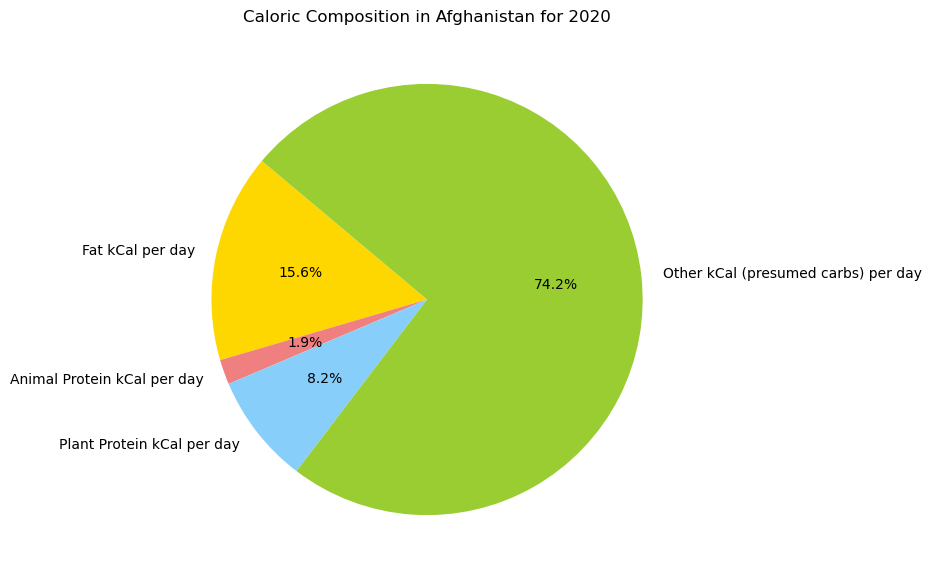

In [6]:
#pie chart generator for dietary macronutrient makeup visualization
# Add new columns
country_filter['Fat kCal per day'] = country_filter['Fat (g) per Capita per day'] * 9
country_filter['Animal Protein kCal per day'] = country_filter['Animal Protein(g) supply per Capita per day'] * 4
country_filter['Plant Protein kCal per day'] = country_filter['Plant Protein(g) supply per Capita per day'] * 4

pie_country = 'Afghanistan'

# Filter for the specific country and year
# Replace 'YourCountry' with the country of your choice
selected_country_data = country_filter[(country_filter['Country'] == pie_country) & (country_filter['Year'] == 2020)]

# If there are multiple rows for the country and year, you might need to aggregate them
# For simplicity, assuming there's only one row per country per year
if not selected_country_data.empty:
    selected_row = selected_country_data.iloc[0]

    # Prepare data for the pie chart
    values = [
        selected_row['Fat kCal per day'],
        selected_row['Animal Protein kCal per day'],
        selected_row['Plant Protein kCal per day'],
        selected_row['Food supply (kcal per capita per day)'] - (selected_row['Fat kCal per day'] + selected_row['Animal Protein kCal per day'] + selected_row['Plant Protein kCal per day'])
    ]
    labels = ['Fat kCal per day', 'Animal Protein kCal per day', 'Plant Protein kCal per day', 'Other kCal (presumed carbs) per day']

    # Plotting the pie chart
    colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen']
    plt.figure(figsize=(10, 7))
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Caloric Composition in {selected_row["Country"]} for 2020')
    plt.show()
else:
    print(f"No data available for the selected country and year.")
